In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#load the data
#load data
df = pd.read_csv("BTC-USD.csv")
#Set data as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2021-12-08,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2021-12-09,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [3]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
2014-09-17,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
2014-09-18,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2014-09-19,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2014-09-20,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
2014-09-21,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2021-12-06,2021-12-06,49413.480469,50929.519531,47281.035156,50582.625000,50582.625000,3.770731e+10
2021-12-07,2021-12-07,50581.828125,51934.781250,50175.808594,50700.085938,50700.085938,3.367681e+10
2021-12-08,2021-12-08,50667.648438,51171.375000,48765.988281,50504.796875,50504.796875,2.847970e+10
2021-12-09,2021-12-09,50450.082031,50797.164063,47358.351563,47672.121094,47672.121094,2.960358e+10


In [4]:
future_days = 5

In [5]:
#Create new column containing future price
df[str(future_days)+'_Day_price_Forecast'] = df[['Close']].shift(-future_days)
#Show data
df[['Close', str(future_days)+'_Day_price_Forecast']]

<ipython-input-5-f814190ba5c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(future_days)+'_Day_price_Forecast'] = df[['Close']].shift(-future_days)


,Close,5_Day_price_Forecast
2014-09-17,457.334015,402.152008
2014-09-18,424.440002,435.790985
2014-09-19,394.795990,423.204987
2014-09-20,408.903992,411.574005
2014-09-21,398.821014,404.424988
...,...,...
2021-12-06,50582.625000,NaN
2021-12-07,50700.085938,NaN
2021-12-08,50504.796875,NaN
2021-12-09,47672.121094,NaN


In [6]:
X = np.array(df[['Close']])
X = X[:df.shape[0] - future_days]
print(X)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [53598.246094]
 [49200.703125]
 [49368.847656]]


In [7]:
y = np.array(df[str(future_days)+'_Day_price_Forecast'])
y = y[:-future_days]
print(y)

[  402.152008   435.790985   423.204987 ... 50504.796875 47672.121094
 48460.320313]


In [8]:
#Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False)

In [9]:
from sklearn.svm import SVR 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [10]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: -2.3258317851669075


In [11]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[ 9289.17202998  9223.84193748  9118.58198841  9047.00545945
  9103.88575528  9142.69867712  9099.91972234  9180.72077997
  9090.11853339  9068.71813491  9096.12945352  9061.57096106
  9377.50940951  9208.38923631  9447.61899537  9240.7091283
  9241.80718894  9194.29181627  9238.79596288  9198.09170882
  9197.62358092  9144.54583848  9095.95270917  9109.63563053
  9115.50884612  9138.08738623  9119.63762176  9376.68080519
  9529.73925985  9539.94087747  9534.05386724  9515.11961069
  9607.78616175 11391.34277586 11310.59711828 11135.97140592
 11093.07004479 10292.59647953 10776.70232539 11291.85251523
 10509.17648085 10673.14958502 10759.59474612 10803.07798019
 10521.59330014 10769.21725002 10652.41452302 10909.23275954
 10233.42925177 10490.34196134 10808.60271274 10788.99659429
 10898.29560318 10921.04105014 10804.65684695 10962.71594817
 10774.94426922 10909.45330711 10504.67636281 10662.27267522
 10634.42973807 10796.4399828  10239.60798477 10314.43214694
 10292.7224171  10409.476

In [12]:
print(y_test)

[ 9190.854492  9137.993164  9228.325195  9123.410156  9087.303711
  9132.488281  9073.942383  9375.474609  9252.277344  9428.333008
  9277.967773  9278.807617  9240.34668   9276.5       9243.614258
  9243.213867  9192.836914  9132.227539  9151.392578  9159.040039
  9185.817383  9164.231445  9374.887695  9525.363281  9581.072266
  9536.892578  9677.113281  9905.166992 10990.873047 10912.823242
 11100.467773 11111.213867 11323.466797 11759.592773 11053.614258
 11246.348633 11205.892578 11747.022461 11779.773438 11601.472656
 11754.045898 11675.739258 11878.111328 11410.525391 11584.93457
 11784.137695 11768.871094 11865.698242 11892.803711 12254.402344
 11991.233398 11758.283203 11878.37207  11592.489258 11681.825195
 11664.847656 11774.595703 11366.134766 11488.363281 11323.397461
 11542.5      11506.865234 11711.505859 11680.820313 11970.478516
 11414.03418  10245.296875 10511.813477 10169.567383 10280.351563
 10369.563477 10131.516602 10242.347656 10363.138672 10400.915039
 10442.1708

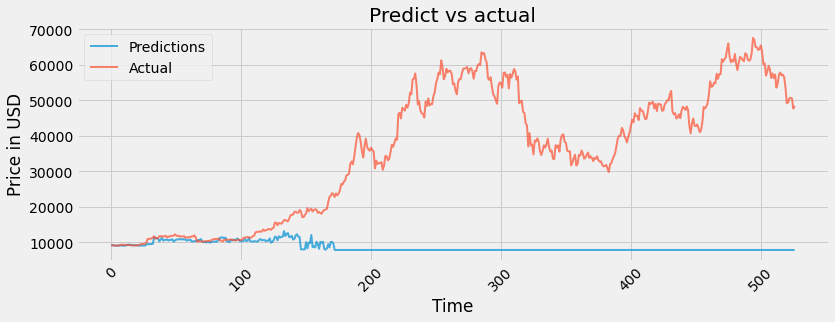

In [13]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label='Predictions', lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2, alpha=.7)
plt.title('Predict vs actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()